In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

sns.set(style="whitegrid")

# Make outputs folder
os.makedirs("outputs", exist_ok=True)


In [26]:
def load_data():
    nav = pd.read_csv("../data/navigation_dataset.csv", parse_dates=["timestamp"])
    thermal = pd.read_csv("../data/thermal_dataset.csv", parse_dates=["timestamp"])
    env = pd.read_csv("../data/environment_dataset.csv", parse_dates=["timestamp"])
    mapping = pd.read_csv("../data/mapping_dataset.csv", parse_dates=["timestamp"])
    rl = pd.read_csv("../data/rl_training_dataset.csv")
    return nav, thermal, env, mapping, rl


nav_df, thermal_df, env_df, mapping_df, rl_df = load_data()

nav_df.head()


,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,obstacle_distance_cm,speed_cm_per_s,direction_label
0,2025-01-01 12:00:00,0.397371,-0.663196,10.178494,0.018434,0.006261,0.038918,78.517860,5.752819,left
1,2025-01-01 12:00:01,-0.110611,-0.448145,9.338917,-0.019667,-0.021470,-0.027559,49.090088,3.195897,forward
2,2025-01-01 12:00:02,0.518151,0.597835,10.234803,0.001437,0.006115,-0.040910,39.373898,3.260674,forward
3,2025-01-01 12:00:03,1.218424,0.488296,10.477819,0.063923,0.027165,-0.000169,27.294284,7.250870,stop
4,2025-01-01 12:00:04,-0.187323,-0.016721,10.006717,0.009555,0.002443,-0.008509,22.952905,2.621176,forward


In [27]:
def explore(df, name):
    print(f"\n===== {name} (HEAD) =====")
    display(df.head())

    print(f"\n===== {name} (INFO) =====")
    print(df.info())

    print(f"\n===== {name} (DESCRIBE) =====")
    display(df.describe(include="all"))


In [28]:
explore(nav_df, "Navigation")
explore(thermal_df, "Thermal")
explore(env_df, "Environment")
explore(mapping_df, "Mapping")
explore(rl_df, "RL Training")
def analyze_rl(rl_df):
    print("\n===== RL Training Analysis =====")
    total_episodes = rl_df["episode"].nunique()
    print(f"Total episodes: {total_episodes}")

    avg_steps_per_episode = rl_df.groupby("episode")["step"].max().mean()
    print(f"Average steps per episode: {avg_steps_per_episode:.2f}")


===== Navigation (HEAD) =====


,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,obstacle_distance_cm,speed_cm_per_s,direction_label
0,2025-01-01 12:00:00,0.397371,-0.663196,10.178494,0.018434,0.006261,0.038918,78.517860,5.752819,left
1,2025-01-01 12:00:01,-0.110611,-0.448145,9.338917,-0.019667,-0.021470,-0.027559,49.090088,3.195897,forward
2,2025-01-01 12:00:02,0.518151,0.597835,10.234803,0.001437,0.006115,-0.040910,39.373898,3.260674,forward
3,2025-01-01 12:00:03,1.218424,0.488296,10.477819,0.063923,0.027165,-0.000169,27.294284,7.250870,stop
4,2025-01-01 12:00:04,-0.187323,-0.016721,10.006717,0.009555,0.002443,-0.008509,22.952905,2.621176,forward



===== Navigation (INFO) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             300 non-null    datetime64[ns]
 1   accel_x               300 non-null    float64       
 2   accel_y               300 non-null    float64       
 3   accel_z               300 non-null    float64       
 4   gyro_x                300 non-null    float64       
 5   gyro_y                300 non-null    float64       
 6   gyro_z                300 non-null    float64       
 7   obstacle_distance_cm  300 non-null    float64       
 8   speed_cm_per_s        300 non-null    float64       
 9   direction_label       300 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 23.6+ KB
None

===== Navigation (DESCRIBE) =====


,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,obstacle_distance_cm,speed_cm_per_s,direction_label
count,300,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,forward
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167
mean,2025-01-01 12:02:29.500000,-0.004439,-0.017192,9.841097,0.004919,0.004586,0.002141,49.630307,4.978662,NaN
min,2025-01-01 12:00:00,-2.593014,-1.977316,8.451557,-0.144813,-0.129552,-0.146068,5.000000,0.000000,NaN
25%,2025-01-01 12:01:14.750000128,-0.546597,-0.563524,9.514262,-0.027807,-0.030534,-0.030440,40.543875,3.678527,NaN
50%,2025-01-01 12:02:29.500000,0.047376,-0.015012,9.821370,0.008258,0.002842,0.000435,49.610149,5.013863,NaN
75%,2025-01-01 12:03:44.249999872,0.501326,0.493070,10.155735,0.037471,0.035541,0.035815,59.541144,6.332043,NaN
max,2025-01-01 12:04:59,3.082185,2.463105,11.116191,0.121988,0.130084,0.159655,97.066228,11.219837,NaN



===== Thermal (HEAD) =====


,timestamp,ambient_temp_c,surface_temp_c,infrared_temp_c,human_heat_detected
0,2025-01-01 12:00:00,22.184488,29.617984,30.412990,0
1,2025-01-01 12:00:01,27.038568,28.332222,29.192634,0
2,2025-01-01 12:00:02,25.021584,27.400013,30.554641,0
3,2025-01-01 12:00:03,26.061161,30.563019,32.232473,0
4,2025-01-01 12:00:04,22.684331,23.153250,29.470479,0



===== Thermal (INFO) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            300 non-null    datetime64[ns]
 1   ambient_temp_c       300 non-null    float64       
 2   surface_temp_c       300 non-null    float64       
 3   infrared_temp_c      300 non-null    float64       
 4   human_heat_detected  300 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 11.8 KB
None

===== Thermal (DESCRIBE) =====


,timestamp,ambient_temp_c,surface_temp_c,infrared_temp_c,human_heat_detected
count,300,300.000000,300.000000,300.000000,300.000000
mean,2025-01-01 12:02:29.500000,24.003104,25.828580,28.217579,0.213333
min,2025-01-01 12:00:00,18.017728,17.279035,16.282205,0.000000
25%,2025-01-01 12:01:14.750000128,22.790596,23.719975,25.146322,0.000000
50%,2025-01-01 12:02:29.500000,23.898698,25.885115,28.182451,0.000000
75%,2025-01-01 12:03:44.249999872,25.246821,28.098448,30.978907,0.000000
max,2025-01-01 12:04:59,31.852475,34.605209,37.280163,1.000000
std,NaN,1.988047,3.085254,4.251874,0.410346



===== Environment (HEAD) =====


,timestamp,gas_level_ppm,humidity_percent,sound_intensity_db,vibration_level,dust_density_mg_m3
0,2025-01-01 12:00:00,425.308666,68.595849,34.509767,0.796137,0.138948
1,2025-01-01 12:00:01,329.180105,60.798015,28.538630,0.950063,0.153468
2,2025-01-01 12:00:02,414.485019,71.395555,41.166692,1.443604,0.159630
3,2025-01-01 12:00:03,504.262243,56.126380,44.682395,0.482910,0.269605
4,2025-01-01 12:00:04,446.893264,49.013796,44.119069,0.082715,0.045032



===== Environment (INFO) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           300 non-null    datetime64[ns]
 1   gas_level_ppm       300 non-null    float64       
 2   humidity_percent    300 non-null    float64       
 3   sound_intensity_db  300 non-null    float64       
 4   vibration_level     300 non-null    float64       
 5   dust_density_mg_m3  300 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 14.2 KB
None

===== Environment (DESCRIBE) =====


,timestamp,gas_level_ppm,humidity_percent,sound_intensity_db,vibration_level,dust_density_mg_m3
count,300,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2025-01-01 12:02:29.500000,398.102337,59.040272,39.881964,0.780660,0.152178
min,2025-01-01 12:00:00,300.000000,29.923677,20.000000,0.001619,0.044763
25%,2025-01-01 12:01:14.750000128,341.032650,53.176425,34.631468,0.291410,0.118159
50%,2025-01-01 12:02:29.500000,393.339893,59.384783,40.324520,0.654683,0.150755
75%,2025-01-01 12:03:44.249999872,444.551013,65.114318,45.657476,1.119446,0.184235
max,2025-01-01 12:04:59,652.164539,83.490758,57.239429,3.176704,0.305646
std,NaN,71.218898,9.961877,7.703432,0.610407,0.049990



===== Mapping (HEAD) =====


,timestamp,x_position_m,y_position_m,room_zone,mapping_confidence
0,2025-01-01 12:00:00,-0.608448,-0.322170,Unknown,0.866256
1,2025-01-01 12:00:01,0.073240,-1.691740,Zone_C,0.814131
2,2025-01-01 12:00:02,-0.229338,-1.098667,Zone_A,0.716557
3,2025-01-01 12:00:03,0.225871,-0.328506,Zone_A,0.973694
4,2025-01-01 12:00:04,1.012738,-0.605094,Zone_A,0.692794



===== Mapping (INFO) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           300 non-null    datetime64[ns]
 1   x_position_m        300 non-null    float64       
 2   y_position_m        300 non-null    float64       
 3   room_zone           300 non-null    object        
 4   mapping_confidence  300 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 11.8+ KB
None

===== Mapping (DESCRIBE) =====


,timestamp,x_position_m,y_position_m,room_zone,mapping_confidence
count,300,300.000000,300.000000,300,300.000000
unique,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,Zone_A,NaN
freq,NaN,NaN,NaN,80,NaN
mean,2025-01-01 12:02:29.500000,-8.802234,-4.857073,NaN,0.793361
min,2025-01-01 12:00:00,-15.717132,-18.990105,NaN,0.511568
25%,2025-01-01 12:01:14.750000128,-13.001620,-7.482750,NaN,0.720585
50%,2025-01-01 12:02:29.500000,-11.300908,-3.866918,NaN,0.790462
75%,2025-01-01 12:03:44.249999872,-5.202087,-0.718097,NaN,0.869380
max,2025-01-01 12:04:59,2.374940,2.102046,NaN,1.000000



===== RL Training (HEAD) =====


,state_id,episode,action_taken,reward,collision,goal_reached
0,0,6,stop,1.478,0,0
1,1,11,turn_right,0.836,0,1
2,2,3,stop,0.329,0,1
3,3,20,move_forward,0.532,0,0
4,4,10,turn_left,0.810,0,1



===== RL Training (INFO) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_id      300 non-null    int64  
 1   episode       300 non-null    int64  
 2   action_taken  300 non-null    object 
 3   reward        300 non-null    float64
 4   collision     300 non-null    int64  
 5   goal_reached  300 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 14.2+ KB
None

===== RL Training (DESCRIBE) =====


,state_id,episode,action_taken,reward,collision,goal_reached
count,300.000000,300.000000,300,300.000000,300.000000,300.000000
unique,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,stop,NaN,NaN,NaN
freq,NaN,NaN,89,NaN,NaN,NaN
mean,149.500000,10.740000,NaN,0.166687,0.120000,0.740000
std,86.746758,5.747682,NaN,0.592108,0.325504,0.439367
min,0.000000,1.000000,NaN,-2.018000,0.000000,0.000000
25%,74.750000,6.000000,NaN,-0.229750,0.000000,0.000000
50%,149.500000,10.000000,NaN,0.187000,0.000000,1.000000
75%,224.250000,16.000000,NaN,0.526750,0.000000,1.000000


In [29]:
def plot_hist(df, column, title):
    plt.figure(figsize=(6,4))
    sns.histplot(df[column], kde=True)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"outputs/{title}.png")
    plt.show()
    plt.close()
   

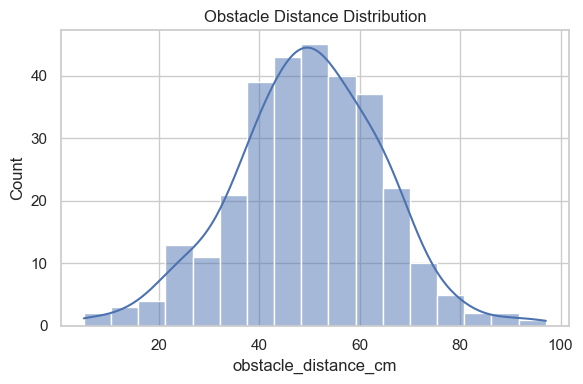

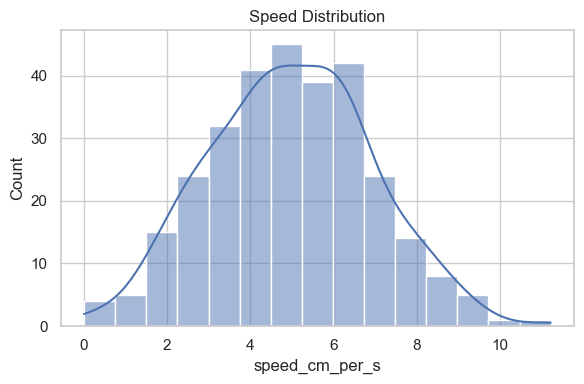

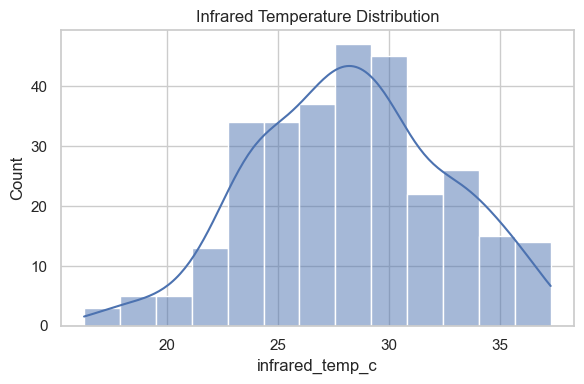

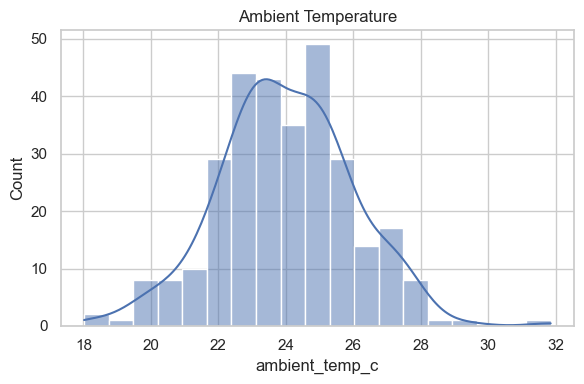

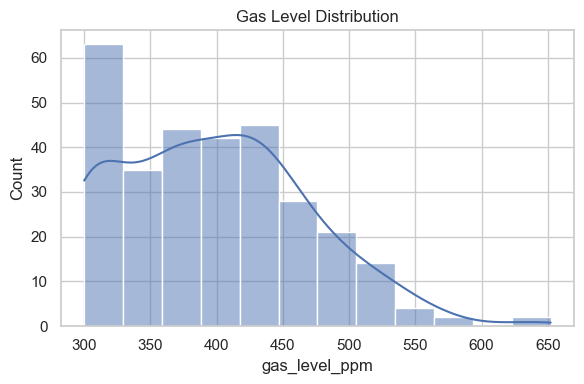

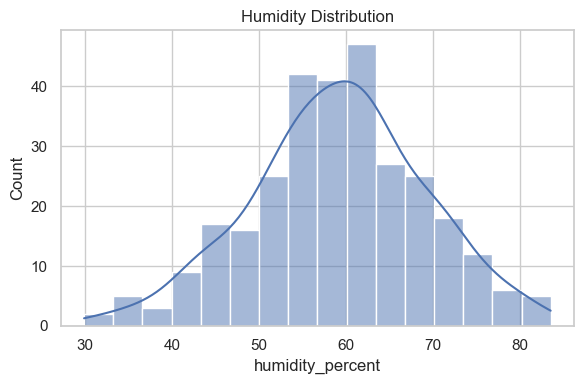

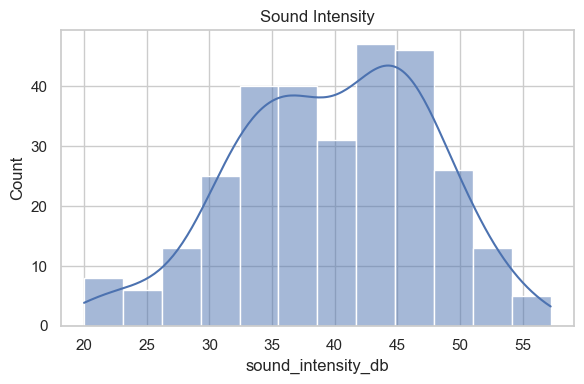

In [30]:
plot_hist(nav_df, "obstacle_distance_cm", "Obstacle Distance Distribution")
plot_hist(nav_df, "speed_cm_per_s", "Speed Distribution")

plot_hist(thermal_df, "infrared_temp_c", "Infrared Temperature Distribution")
plot_hist(thermal_df, "ambient_temp_c", "Ambient Temperature")

plot_hist(env_df, "gas_level_ppm", "Gas Level Distribution")
plot_hist(env_df, "humidity_percent", "Humidity Distribution")
plot_hist(env_df, "sound_intensity_db", "Sound Intensity")


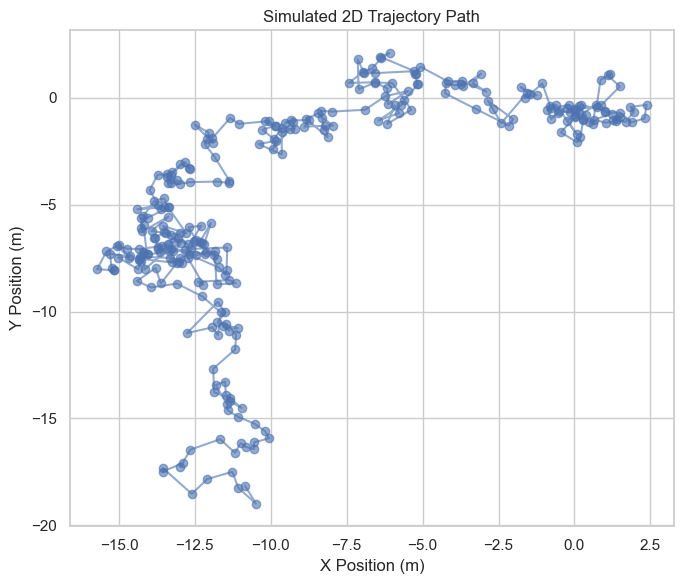

In [31]:
plt.figure(figsize=(7,6))
plt.plot(mapping_df["x_position_m"], mapping_df["y_position_m"],
         marker='o', linestyle='-', alpha=0.6)
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Simulated 2D Trajectory Path")
plt.tight_layout()
plt.savefig("outputs/trajectory_map.png")
plt.show()
plt.close()


#📦 MACHINE LEARNING MODELS

##📌 Cell 8 — Navigation model (Random Forest)

=== Navigation Model Results ===
              precision    recall  f1-score   support

     forward       0.56      0.95      0.70        42
        left       0.50      0.08      0.13        13
       right       0.00      0.00      0.00        11
        stop       0.00      0.00      0.00         9

    accuracy                           0.55        75
   macro avg       0.26      0.26      0.21        75
weighted avg       0.40      0.55      0.42        75



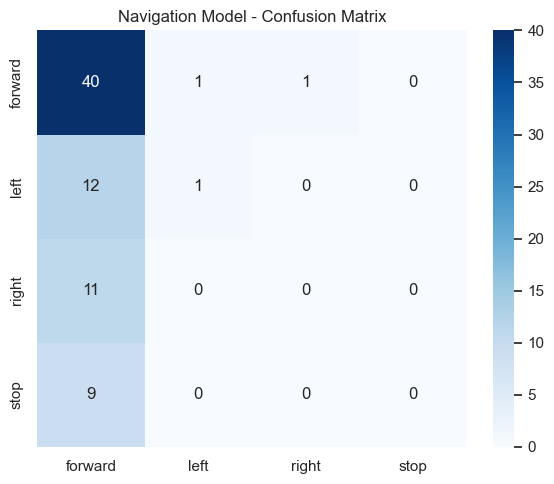

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

def train_navigation_model(df):

    features = [
        "accel_x","accel_y","accel_z",
        "gyro_x","gyro_y","gyro_z",
        "obstacle_distance_cm","speed_cm_per_s"
    ]

    X = df[features]
    y = df["direction_label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("rf", RandomForestClassifier(n_estimators=200, random_state=42))
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("=== Navigation Model Results ===")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=model.classes_,
                yticklabels=model.classes_,
                cmap="Blues")
    plt.title("Navigation Model - Confusion Matrix")
    plt.tight_layout()
    plt.savefig("outputs/navigation_confusion_matrix.png")
    plt.show()

    return model


nav_model = train_navigation_model(nav_df)


##Cell 9 — Thermal model (Logistic Regression)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def train_thermal_model(df):

    X = df[["ambient_temp_c","surface_temp_c","infrared_temp_c"]]
    y = df["human_heat_detected"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(max_iter=1000))
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print("=== Thermal Model Results ===")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

    return model


thermal_model = train_thermal_model(thermal_df)


=== Thermal Model Results ===
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        59
           1       0.00      0.00      0.00        16

    accuracy                           0.79        75
   macro avg       0.39      0.50      0.44        75
weighted avg       0.62      0.79      0.69        75

ROC-AUC: 0.5593220338983051


##🤖 Reinforcement Learning Analysis

## 📌 Cell 10 — Analyze RL logs

In [34]:
def analyze_rl(df):
    print("\n=== RL Statistics ===")
    display(df.describe(include="all"))

    print("\nAverage reward per action:")
    display(df.groupby("action_taken")["reward"].mean())

    print("\nCollision rate:")
    print(df["collision"].mean())

    print("\nGoal reached rate:")
    print(df["goal_reached"].mean())

    print("\nTop 10 episodes by average reward:")
    display(df.groupby("episode")["reward"].mean().sort_values(ascending=False).head(10))


analyze_rl(rl_df)



=== RL Statistics ===


,state_id,episode,action_taken,reward,collision,goal_reached
count,300.000000,300.000000,300,300.000000,300.000000,300.000000
unique,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,stop,NaN,NaN,NaN
freq,NaN,NaN,89,NaN,NaN,NaN
mean,149.500000,10.740000,NaN,0.166687,0.120000,0.740000
std,86.746758,5.747682,NaN,0.592108,0.325504,0.439367
min,0.000000,1.000000,NaN,-2.018000,0.000000,0.000000
25%,74.750000,6.000000,NaN,-0.229750,0.000000,0.000000
50%,149.500000,10.000000,NaN,0.187000,0.000000,1.000000
75%,224.250000,16.000000,NaN,0.526750,0.000000,1.000000



Average reward per action:


action_taken
move_forward    0.094747
stop            0.201101
turn_left       0.146589
turn_right      0.215974
Name: reward, dtype: float64


Collision rate:
0.12

Goal reached rate:
0.74

Top 10 episodes by average reward:


episode
14    0.666222
13    0.405250
17    0.351154
3     0.327071
7     0.293947
18    0.265833
20    0.256462
1     0.240667
6     0.197308
5     0.154368
Name: reward, dtype: float64

In [35]:
import numpy as np
import time
import os

GRID_SIZE = 10

# 0 = empty, 1 = obstacle, 2 = reward
env = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

# Add random obstacles
for _ in range(10):
    x, y = np.random.randint(0, GRID_SIZE, size=2)
    env[x, y] = 1

# Add reward
reward_x, reward_y = np.random.randint(0, GRID_SIZE, size=2)
env[reward_x, reward_y] = 2

# Agent start position
agent_x = 0
agent_y = 0

def print_env():
    os.system("cls" if os.name == "nt" else "clear")
    grid = env.copy()
    grid[agent_x, agent_y] = 9  # Agent position
    print(grid)

print("Starting simulation...")
time.sleep(1)

for step in range(50):
    print_env()

    # Random movement
    action = np.random.choice(["up", "down", "left", "right"])

    new_x, new_y = agent_x, agent_y

    if action == "up" and agent_x > 0:
        new_x -= 1
    if action == "down" and agent_x < GRID_SIZE - 1:
        new_x += 1
    if action == "left" and agent_y > 0:
        new_y -= 1
    if action == "right" and agent_y < GRID_SIZE - 1:
        new_y += 1

    # Check obstacle
    if env[new_x, new_y] == 1:
        print("Obstacle hit! Changing direction...")
        time.sleep(0.5)
        continue

    # Apply movement
    agent_x, agent_y = new_x, new_y

    # Check reward
    if agent_x == reward_x and agent_y == reward_y:
        print("Reward reached! Simulation complete.")
        break

    time.sleep(0.3)


Starting simulation...
[[9 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 1 0 0 0]]
[[0 0 0 0 0 0 0 0 1 0]
 [9 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 1 0 0 0]]
Obstacle hit! Changing direction...
[[0 0 0 0 0 0 0 0 1 0]
 [9 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 1 0 0 0]]
[[9 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 1 0 0 0]]
[[0 0 0 0 0 0 0 0

In [36]:
import pygame
import random

pygame.init()
WIDTH, HEIGHT = 600, 600
win = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("AI Agent Simulation")

agent_pos = [50, 50]
agent_speed = 3

# Create obstacles
obstacles = []
for _ in range(10):
    x = random.randint(50, 550)
    y = random.randint(50, 550)
    obstacles.append(pygame.Rect(x, y, 40, 40))

run = True
clock = pygame.time.Clock()

def move_agent():
    direction = random.choice(["up", "down", "left", "right"])
    if direction == "up": agent_pos[1] -= agent_speed
    if direction == "down": agent_pos[1] += agent_speed
    if direction == "left": agent_pos[0] -= agent_speed
    if direction == "right": agent_pos[0] += agent_speed

while run:
    clock.tick(30)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False

    move_agent()

    win.fill((20, 20, 20))

    # Draw agent
    pygame.draw.circle(win, (0, 255, 0), agent_pos, 10)

    # Draw obstacles
    for obs in obstacles:
        pygame.draw.rect(win, (255, 0, 0), obs)

    pygame.display.update()

pygame.quit()


ModuleNotFoundError: No module named 'pygame'